# 7 - Carga y preprocesamiento de datos

Una parte esencial de los procesos de *machine learning*, y que las distingue de forma esencial del aprendizaje profundo, es el preprocesamiento de datos. En este último, es la propia arquitectura del modelo la que, con una conveniente preparación de hiperparámetros y ajuste de capas, se encarga de abstraer, priorizar y manipular la información subyacente de los datos introducidos.

Sin embargo, en los modelos de *machine learning*, debe existir un amplio proceso de preprocesado de datos, del cual depende en gran parte el rendimiento de nuestro modelo. A lo largo de este *notebook*, descubriremos algunas de las técnicas más importantes que cualquier científico de datos debe conocer, para que los datos puedan ser empleados en modelos predictivos.

## 7.1 - Apertura, lectura y escritura de datos

Nos limitaremos a estudiar la ingesta de datos tabulares o de texto plano, que son los que se emplean en los modelos predictivos que estudiaremos.

### Ficheros `txt`

Un Texto plano (*plain text*), son aquellos archivos formados exclusivamente por texto (sólo caracteres), sin ningún formato; es decir, no requieren ser interpretados para leerse (aunque pueden ser procesados en algunos casos). También son llamados archivos de texto llano, simple o sin formato.

Comenzaremos por aprender a descargar ficheros desde cualquier URL, una actividad muy útil para no tener que tener previamente cargados ficheros en memoria y que toda la actividad discurra durante la ejecución del código en el directorio activo:

In [1]:
help(open)

Help on function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position).
    In

In [1]:
# Librerías
import os # Para obtener el directorio activo
import requests # Para descargar ficheros

In [2]:
# Preparamos una URL
URL = 'https://raw.githubusercontent.com/brunoklein99/deep-learning-notes/master/shakespeare.txt'

# Descargamos el fichero
with requests.get(URL) as response:
    open(os.path.join(os.getcwd(), 'shakespeare_sonnet.txt'), "wb").write(response.content)

Pasamos a continuación a estudiar cómo abrir, leer y escribir dichos ficheros:
* Apertura:
  * Abrir fichero de lectura: `f = open("fichero.txt", "r")`
  * Abrir fichero de lectura en binario: `f = open("fichero.txt", "rb")`
  * Abrir fichero para escribir desde cero: `f = open ("fichero.txt", "w")`
* Lectura:
  * Lectura de todo el fichero de golpe: `text = f.read()`
  * Lectura de 100 bytes: `text = f.read(100)`
  * Lectura de una línea completa: `text = f.readline()`
  * Lectura de líneas completas: `text = f.readlines()`
* Escritura:
  * Escritura del fichero: `f.write('texto a insertar')`

Es habitual, como hicimos con anterioridad para la descarga de ficheros, usar el *statement* `with` para no tener que realizar asignaciones de variables para la apertura de ficheros, ni tener que explícitamente declarar su cierre:

In [3]:
os.getcwd() #Nos dice la ruta donde se encuentra nuestra fichero

'c:\\Users\\israe\\OneDrive\\Escritorio\\Data Analist\\Modulo0\\BootCamp\\Carga y preprocesamiento'

In [4]:
# Apertura y lectura de fichero
with open(os.path.join(os.getcwd(), 'shakespeare_sonnet.txt'),'r') as f: #Que ocurre con rb?
    text = f.read()

print(text)

THE SONNETS

by William Shakespeare

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And tender churl mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.

When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a tattered weed of small worth held:  
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say within thine own deep sunken eyes,
Were an all-eating shame, and thriftless prais

Si realizamos una impresión por pantalla de la variable `text`, encontraremos algo como lo siguiente:

```txt
THE SONNETS\n\nby William Shakespeare\n\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,...
```

Te proponemos como ejercicio averiguar de qué forma se puede conseguir que este texto luzca sin los saltos de línea impresos, y en su lugar resulte en una lista cuyos elementos sean las líneas del texto.
<details>
<summary>
Pincha aquí para ver la solución
</summary>
text = f.read().splitlines()

Veamos finalmente cómo guardarlos:

In [5]:
with open(os.path.join(os.getcwd(), 'nuevo_fichero.txt'), 'w') as f:
    f.write('Has perdido')

In [6]:
with open('nuevo_fichero.txt','a') as f:
    f.write('\nHola me llamo Israel')
    f.write(' y vivo en el sur \nData Analytics')

### Ficheros `csv`

En este caso, con la ayuda de la librería `csv`, seremos capaces de mimetizar la lectura de ficheros `txt` ya conocida:

In [7]:
# Librería
import csv

# Descargamos el fichero
URL = 'https://raw.githubusercontent.com/codeforamerica/ohana-api/master/data/sample-csv/addresses.csv'
with requests.get(URL) as response:
    open(os.path.join(os.getcwd(), 'sample_file.csv'), "wb").write(response.content)
 


In [10]:
# Abrimos y leemos el fichero
csv_filas = [] # Iremos acumulando las filas del fichero en una lista
with open(os.path.join(os.getcwd(), 'sample_file.csv'), newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        csv_filas.append(row)


In [11]:
csv_filas

[['id',
  'location_id',
  'address_1',
  'address_2',
  'city',
  'state_province',
  'postal_code',
  'country'],
 ['1', '1', '2600 Middlefield Road', '', 'Redwood City', 'CA', '94063', 'US'],
 ['2', '2', '24 Second Avenue', '', 'San Mateo', 'CA', '94401', 'US'],
 ['3', '3', '24 Second Avenue', '', 'San Mateo', 'CA', '94403', 'US'],
 ['4', '4', '24 Second Avenue', '', 'San Mateo', 'CA', '94401', 'US'],
 ['5', '5', '24 Second Avenue', '', 'San Mateo', 'CA', '94401', 'US'],
 ['6', '6', '800 Middle Avenue', '', 'Menlo Park', 'CA', '94025-9881', 'US'],
 ['7', '7', '500 Arbor Road', '', 'Menlo Park', 'CA', '94025', 'US'],
 ['8', '8', '800 Middle Avenue', '', 'Menlo Park', 'CA', '94025-9881', 'US'],
 ['9', '9', '2510 Middlefield Road', '', 'Redwood City', 'CA', '94063', 'US'],
 ['10',
  '10',
  '1044 Middlefield Road',
  '',
  'Redwood City',
  'CA',
  '94063',
  'US'],
 ['11', '11', '2140 Euclid Avenue.', '', 'Redwood City', 'CA', '94061', 'US'],
 ['12',
  '12',
  '1044 Middlefield Road',

In [ ]:

# Escribimos el fichero, que automáticamente interpreta que la primera lista
# de nuestra cadena serán los títulos de las columnas, y las sucesivas sus valores
with open('nuevo_fichero.csv', 'w') as myFile:
    writer = csv.writer(myFile)
    writer.writerows(csv_filas)

In [9]:
csv_filas

[['id',
  'location_id',
  'address_1',
  'address_2',
  'city',
  'state_province',
  'postal_code',
  'country'],
 ['1', '1', '2600 Middlefield Road', '', 'Redwood City', 'CA', '94063', 'US'],
 ['2', '2', '24 Second Avenue', '', 'San Mateo', 'CA', '94401', 'US'],
 ['3', '3', '24 Second Avenue', '', 'San Mateo', 'CA', '94403', 'US'],
 ['4', '4', '24 Second Avenue', '', 'San Mateo', 'CA', '94401', 'US'],
 ['5', '5', '24 Second Avenue', '', 'San Mateo', 'CA', '94401', 'US'],
 ['6', '6', '800 Middle Avenue', '', 'Menlo Park', 'CA', '94025-9881', 'US'],
 ['7', '7', '500 Arbor Road', '', 'Menlo Park', 'CA', '94025', 'US'],
 ['8', '8', '800 Middle Avenue', '', 'Menlo Park', 'CA', '94025-9881', 'US'],
 ['9', '9', '2510 Middlefield Road', '', 'Redwood City', 'CA', '94063', 'US'],
 ['10',
  '10',
  '1044 Middlefield Road',
  '',
  'Redwood City',
  'CA',
  '94063',
  'US'],
 ['11', '11', '2140 Euclid Avenue.', '', 'Redwood City', 'CA', '94061', 'US'],
 ['12',
  '12',
  '1044 Middlefield Road',

In [12]:
import pandas as pd
df = pd.DataFrame(csv_filas)
df

,0,1,2,3,4,5,6,7
0,id,location_id,address_1,address_2,city,state_province,postal_code,country
1,1,1,2600 Middlefield Road,,Redwood City,CA,94063,US
2,2,2,24 Second Avenue,,San Mateo,CA,94401,US
3,3,3,24 Second Avenue,,San Mateo,CA,94403,US
4,4,4,24 Second Avenue,,San Mateo,CA,94401,US
5,5,5,24 Second Avenue,,San Mateo,CA,94401,US
6,6,6,800 Middle Avenue,,Menlo Park,CA,94025-9881,US
7,7,7,500 Arbor Road,,Menlo Park,CA,94025,US
8,8,8,800 Middle Avenue,,Menlo Park,CA,94025-9881,US
9,9,9,2510 Middlefield Road,,Redwood City,CA,94063,US


Por otra parte, la librería `pandas` proporciona un método bastante conocido para importar este tipo de ficheros, que exploraremos en detalle en la próxia sección:

In [254]:
# Librería
import pandas as pd
# Método para importar
data = pd.read_csv(os.path.join(os.getcwd(), 'sample_file.csv'))
print(data)


    id  location_id                   address_1  address_2  \
0    1            1       2600 Middlefield Road        NaN   
1    2            2            24 Second Avenue        NaN   
2    3            3            24 Second Avenue        NaN   
3    4            4            24 Second Avenue        NaN   
4    5            5            24 Second Avenue        NaN   
5    6            6           800 Middle Avenue        NaN   
6    7            7              500 Arbor Road        NaN   
7    8            8           800 Middle Avenue        NaN   
8    9            9       2510 Middlefield Road        NaN   
9   10           10       1044 Middlefield Road        NaN   
10  11           11         2140 Euclid Avenue.        NaN   
11  12           12       1044 Middlefield Road  2nd Floor   
12  13           13         399 Marine Parkway.        NaN   
13  14           14          660 Veterans Blvd.        NaN   
14  15           15        1500 Valencia Street        NaN   
15  16  

In [255]:
data1 = pd.read_csv(os.path.join(os.getcwd(), 'nuevo_fichero.csv'))
print(data1)

    id  location_id                   address_1  address_2  \
0    1            1       2600 Middlefield Road        NaN   
1    2            2            24 Second Avenue        NaN   
2    3            3            24 Second Avenue        NaN   
3    4            4            24 Second Avenue        NaN   
4    5            5            24 Second Avenue        NaN   
5    6            6           800 Middle Avenue        NaN   
6    7            7              500 Arbor Road        NaN   
7    8            8           800 Middle Avenue        NaN   
8    9            9       2510 Middlefield Road        NaN   
9   10           10       1044 Middlefield Road        NaN   
10  11           11         2140 Euclid Avenue.        NaN   
11  12           12       1044 Middlefield Road  2nd Floor   
12  13           13         399 Marine Parkway.        NaN   
13  14           14          660 Veterans Blvd.        NaN   
14  15           15        1500 Valencia Street        NaN   
15  16  

### Ficheros `json`

De una forma similar, la librería `json` nos permite adaptar la manipulación de ficheros sin formato a ficheros de tipo serializado, que se identifican en nuestro lenguaje con los diccionarios:

In [256]:
# Librería
import json

# Descargamos el fichero
URL = 'https://raw.githubusercontent.com/LearnWebCode/json-example/master/pets-data.json'
with requests.get(URL) as response:
    open(os.path.join(os.getcwd(), 'sample_file.json'), "wb").write(response.content)

In [257]:
# Abrimos y leemos el fichero
with open(os.path.join(os.getcwd(), 'sample_file.json')) as f:  
    dictionary = json.load(f)

# Visualizamos el diccionario subyacente
dictionary

{'pets': [{'name': 'Purrsloud',
   'species': 'Cat',
   'favFoods': ['wet food', 'dry food', '<strong>any</strong> food'],
   'birthYear': 2016,
   'photo': 'https://learnwebcode.github.io/json-example/images/cat-2.jpg'},
  {'name': 'Barksalot',
   'species': 'Dog',
   'birthYear': 2008,
   'photo': 'https://learnwebcode.github.io/json-example/images/dog-1.jpg'},
  {'name': 'Meowsalot',
   'species': 'Cat',
   'favFoods': ['tuna', 'catnip', 'celery'],
   'birthYear': 2012,
   'photo': 'https://learnwebcode.github.io/json-example/images/cat-1.jpg'}]}

In [258]:
# Escribimos el fichero sin modificaciones, con un nuevo nombre
with open("nuevo_fichero.json", "w") as outfile:
    json.dump(dictionary, outfile)

Ejercicio:
¿Como accederiamos hasta cada una de las URL de las imagenes dentro de este diccionario?

In [259]:
dictionary['pets'][2]['photo']

'https://learnwebcode.github.io/json-example/images/cat-1.jpg'

In [260]:
#[dictionary]['pets'][i]['photo'] for i in range(len(dictionary['pets']))

### (Avanzado) Ficheros `data`

Es muy habitual que, debido al tamaño de determinados conjuntos de datos, posean una codificación particular que haga su gestión más eficiente. Es el caso de numerosos bancos de datos, como el que forma el [gran repositorio](https://archive.ics.uci.edu/ml/datasets.php) de la Universidad de California, Irvine (*UCI*).

Seleccionando cualquiera de los *datasets*, apreciamos que nos aparecen dos tipos de ficheros: el `.data` y el `.names`. El primero de ellos contiene el cuerpo de los datos, y el segundo los metadatos asociados, en particular los nombres de las columnas.

A continuación, vamos a ver cómo descargarlos de una forma más *natural*, que es por comandos de Linux por consola:

```bash
# Creamos una carpeta para que contenga a nuestro dataset
mkdir /content/flag_dataset
# Movemos el directorio activo a esa localización
cd /content/flag_dataset
# Descargamos el fichero que contiene los datos a nuestro directorio activo
curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data -o flag.data
# Descargamos la metadata asociada al conjunto de datos
curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names -o flag.names
```

Nuevamente, al trabajar en un cuaderno, nos limitamos a usar funcionalidades propias de este:

In [261]:
# Librerías
import os
import requests
# Vamos a la ruta de nuestra carpeta
os.chdir('C:\\Users\\israe\\OneDrive\\Escritorio\\Data Analist\\Modulo0\\BootCamp\\Carga y preprocesamiento')
# Creamos una carpeta para que contenga a nuestro dataset, asegurándonos de que no haya sido ya creado
if not os.path.isdir('flag_dataset/'): os.mkdir('flag_dataset/')
# Movemos el directorio activo a esa localización
os.chdir('flag_dataset')
# Descargamos el fichero que contiene los datos a nuestro directorio activo
response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data')
with open("flag.data", "wb") as f:
    f.write(response.content)
# Descargamos la metadata asociada al conjunto de datos
response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names')
with open("flag.names", "wb") as f:
    f.write(response.content)

Vamos ahora a leer ambos ficheros, prestando particular atención a la metadata, que es de donde debemos saber cómo extraer los nombres de las columnas:

In [262]:
# Leemos datos
with open('flag.data','r') as f:
    data = f.read().splitlines() # Dividimos el texto por saltos de línea
    data = [elem.split(',') for elem in data] # Dividimos cada línea por las comas y removemos líneas vacías
# Leemos metadata
with open('flag.names','r') as f:
    metadata = f.read().splitlines()

In [263]:
data

[['Afghanistan',
  '5',
  '1',
  '648',
  '16',
  '10',
  '2',
  '0',
  '3',
  '5',
  '1',
  '1',
  '0',
  '1',
  '1',
  '1',
  '0',
  'green',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  'black',
  'green'],
 ['Albania',
  '3',
  '1',
  '29',
  '3',
  '6',
  '6',
  '0',
  '0',
  '3',
  '1',
  '0',
  '0',
  '1',
  '0',
  '1',
  '0',
  'red',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0',
  'red',
  'red'],
 ['Algeria',
  '4',
  '1',
  '2388',
  '20',
  '8',
  '2',
  '2',
  '0',
  '3',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  'green',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  'green',
  'white'],
 ['American-Samoa',
  '6',
  '3',
  '0',
  '0',
  '1',
  '1',
  '0',
  '0',
  '5',
  '1',
  '0',
  '1',
  '1',
  '1',
  '0',
  '1',
  'blue',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '1',
  '0',
  'blue',
  'red'],
 ['Andorra',
  '3',
  '1',
  '0',
  '0',
  '6',
  '0',
  '3',
  '0',
  '3'

In [264]:
metadata

['1. TItle: Flag database',
 '',
 '2. Source Information',
 '   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":',
 '      Collins Publishers (1986).',
 '   -- Donor: Richard S. Forsyth ',
 '             8 Grosvenor Avenue',
 '             Mapperley Park',
 '             Nottingham NG3 5DX',
 '             0602-621676',
 '   -- Date: 5/15/1990',
 '',
 '3. Past Usage:',
 "   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.",
 '',
 '4. Relevant Information:',
 '   -- This data file contains details of various nations and their flags.',
 '      In this file the fields are separated by spaces (not commas).  With',
 '      this data you can try things like predicting the religion of a country',
 '      from its size and the colours in its flag.  ',
 '   -- 10 attributes are numeric-valued.  The remainder are either Boolean-',
 '      or nominal-valued.',
 '',
 '5. Number of Instances: 194',
 '',
 '6. Number of attributes: 30 (overall)',
 '',

Como podemos apreciar, tanto el nombre como la descripción de las columnas se caracterizan por:

* Vienen especificadas en la sección `7. Attribute Information`.
* Llevan un espacio introductorio, proseguido por:
  * Unos dígitos.
  * Un punto.
  * Nombre de la columna.
  * Espacio en blanco.
  * Descripción.

Esta descripción, aunque evidente, forma parte del análisis preciso para extraer información a partir de lo que se conoce como **espresiones regulares** (`regex`), en las cuales se localizan cadenas de texto a partir de determinados patrones preestablecidos.

Procederemos ahora mediante su uso a extraer de forma elegante todos los nombre de las columnas del conjunto de datos:

In [265]:
# Librería para el uso de expresiones regulares
import re

# Expresión regular que cumple todos los requisitos anteriores
## '\s{1}' sirve para detectar exactamente un espacio
## '\s+' sirve para detectar uno o más espacios
## '\d+' sirve para detectar uno o más dígitos
## [.] sirve para localizar exactamente un punto
## '[a-zA-Z]+' sirve para detectar cadenas de texto no vacías con letras del alfabeto
regex_fn = lambda text: re.findall('^\s+\d+[.]\s{1}[a-zA-Z]+', text)

# Aplicamos la expresión regular en forma de lambda a al metadata
# Téngase en cuenta que el método findall devuelve una lista vacía
# si ninguna expresión coincide con el patrón introducido
metadata = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]

Observemos cómo, en efecto, hemos obtenido todos los nombres de las columnas:

In [266]:
metadata

['   1. name',
 '   2. landmass',
 '   3. zone',
 '   4. area',
 '   5. population',
 '   6. language',
 '   7. religion',
 '   8. bars',
 '   9. stripes',
 '  10. colours',
 '  11. red',
 '  12. green',
 '  13. blue',
 '  14. gold',
 '  15. white',
 '  16. black',
 '  17. orange',
 '  18. mainhue',
 '  19. circles',
 '  20. crosses',
 '  21. saltires',
 '  22. quarters',
 '  23. sunstars',
 '  24. crescent',
 '  25. triangle',
 '  26. icon',
 '  27. animate',
 '  28. text',
 '  29. topleft',
 '  30. botright']

Ahora simplemente nos queda extraer la cadena de texto que queremos, y construir un objeto `pd.DataFrame` para su manipulación:

In [267]:
# Expresión regular para filtrar el texto concreto
reg_text_fn = lambda text : re.findall('[a-zA-Z]+', text)
col_names = [reg_text_fn(elem)[0] for elem in metadata if regex_fn(elem)]
col_names


['name',
 'landmass',
 'zone',
 'area',
 'population',
 'language',
 'religion',
 'bars',
 'stripes',
 'colours',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'mainhue',
 'circles',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text',
 'topleft',
 'botright']

In [268]:
# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


Ya estaríamos pues en condiciones de procesar cualquier conjunto de datos de UCI, a falta de retocar algunos detalles menores dependiendo de cada conjunto de datos como veremos en la última sección. Para un conocimiento más exhaustivo de las expresiones regulares, el siguiente [recurso](https://www.w3schools.com/python/python_regex.asp) proporciona una gran cantidad de información al respecto.

## 7.2 - Procesamiento de datos

Una vez hemos conseguido adquirir datos, es hora de manipularlos. Para ello, es importante entender que existen esencialmente dos grandes tipos de variables:

* Continuas: Son aquellas que pueden tomar una cantidad indefinida de valores. 
* Discretas: Son aquellas que toman una cantidad **finita** de valores.

Es muy frecuente establecer la asociación entre variables continuas y numéricas, y variables discretas y categóricas. Pero, nada más lejos de la realidad, podemos tener variables numéricas tales como la edad que son discretas, o una cadena de texto arbitraria, que puede tomar una cantidad indefinida de valores.

### Lectura y manipulación del *dataset*

Tomaremos como primera instancia de cómo manipular este tipo de datos uno de los proporcionados por la librería `sklearn`, que será muchas veces usada a lo largo del curso:

In [269]:
# Cargamos la utilidad necesaria de la librería
from sklearn.datasets import fetch_california_housing
# Cargamos los datos
## El parámetro 'return_X_y' hace que no devuelva los metadatos asociados
## y simplemente retorne las variables.
## El parámetro 'as_frame' hace que nos devuelva un objeto pd.DataFrame
X, y = fetch_california_housing(return_X_y = True, as_frame=True)

Echemos un vistazo a las variables que contiene este conjunto de datos con el método `info()`:

In [270]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Veamos qué aspecto tienen las primeras filas del mismo:

In [271]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Haciendo uso de la documentación, vemos que se corresponden con lo siguiente:
print(fetch_california_housing(as_frame=True).DESCR)

```txt
    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

```

Observamos cómo variables como la **mediana** de la edad de las casas del bloque, así como la población de cada bloque, se pueden considerar discretas ya que se corresponden con números naturales (con muchos posibles valores, sí, pero **finitos**). Comenzaremos pues por convertir los valores de esas columnas a números enteros (es decir, variables de tipo `int`):

In [272]:
# Variable HouseAge
X['HouseAge'] = X['HouseAge'].astype('int')
# Variable Population
X['Population'] = X['Population'].astype('int')

In [273]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int32  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int32  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(6), int32(2)
memory usage: 1.1 MB


In [274]:
X


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32


### Estudio de variables continuas

Por una parte, las variables continuas poseen unos tipos de preprocesamiento más *elementales*:

* Estandarización de sus valores a un intervalo $[a,b]$ (que normalmente es el $[0,1]$).
* Estandarización de sus valores para tener media cero y varianza uno (*normalización*).

Por cuestiones que trascenden a las competencias de este curso, generalmente se suele elegir el segundo frente al primero, aunque existen excepciones. Fijemos nuestra atención en una columna concreta del conjunto de datos y veamos cómo realizar ambas:

<Axes: >

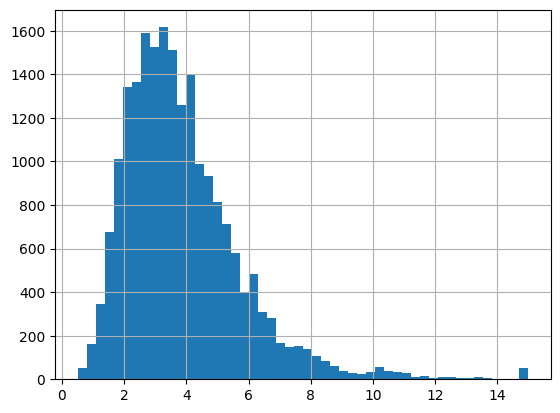

In [275]:
# Tomamos como muestra la columna MedInc y esbozamos su distribución
# con el método `plot` de los objetos DataFrame y Series de pandas
X['MedInc'].hist(bins=50)

Comenzaremos por implementar la que nos lleva los valores de la muestra a un intervalo fijo $[0,1]$. Para ello, tendremos que realizar una transformación lineal que nos lleve el mínimo valor de la distribución al valor $0$, y el máximo a $1$, que será:

In [276]:
# Implementamos dicha función en términos de una lambda
# por cuestione de optimización, aprovechando la vecto-
# rización de operaciones disponible con numPy
int_fn = lambda col: (col-min(col))/(max(col)-min(col))

Veamos ahora que, efectivamente, nuestros valores se encuentran en dicho intervalo:

<Axes: >

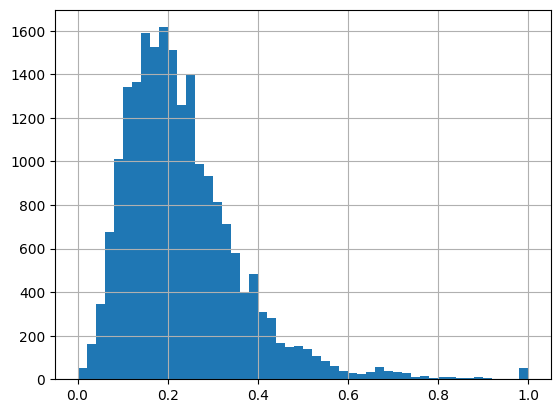

In [277]:
int_fn(X['MedInc']).hist(bins=50)

Esta misma operación puede realizarse utilizando métodos ya implementados en `sklearn`. Es importante tener en cuenta que, en este caso, va a esperar que introduzcamos datos bidimensionales, dado que permite procesar varias columnas a la vez de forma independiente), por lo que si queremos introducir una sola, debemos tenerlo en cuenta. Además, este método no nos devuelve un objeto `pd.Series` respetando la tipología de nuestro método anterior, si no que nos devuelve un array de `numpy`:

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X[['MedInc']])

array([[0.53966842],
       [0.53802706],
       [0.46602805],
       ...,
       [0.08276438],
       [0.09429525],
       [0.13025338]])

Seguidamente, procedamos a realizar un cálculo similar con la normalización, teniendo en cuenta que para ello necesitaremos obtener la media y la varianza de nuestros datos en lugar del máximo y el mínimo:

In [279]:
# Implementamos dicha función en términos de una lambda
# por cuestione de optimización, aprovechando la vecto-
# rización de operaciones disponible con numPy
import numpy as np
norm_fn = lambda col: (col-np.mean(col))/(np.sqrt(col))

<Axes: >

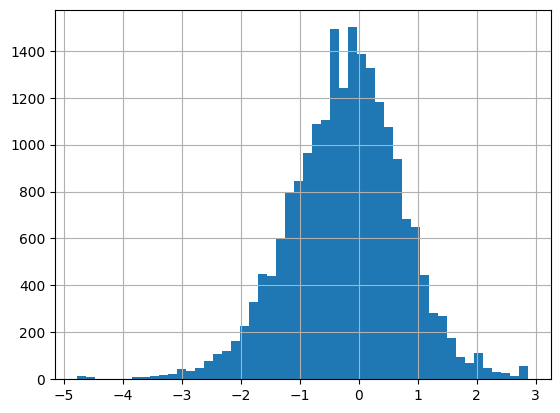

In [280]:
norm_fn(X['MedInc']).hist(bins=50)

De nuevo, podemos realizar los cálculos con `sklearn`:

In [281]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X[['MedInc']])

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]])

Como ya hemos mencionado antes, los modelos predictivos suelen mostrar un mejor comportamiento cuando las variables continuas muestran un cierto comportamiento *normal*; esto es, su distribución se ajusta en cierto modo a la conocida campana de Gauss.

Uno de los principales componentes clave de tal distribución es, precisamente, la simetría, que es lo que vamos a proceder a comprobar a continuación mediante el coeficiente de Fisher-Pearson:

In [282]:
# Importamos funcionalidad de la librería
from scipy.stats import skew
print(f"Valor del coeficiente de Fisher-Pearson sobre la distribución original: {skew(X['MedInc'])}")
print(f"Valor del coeficiente de Fisher-Pearson sobre la distribución normalizada: {skew(norm_fn(X['MedInc']))}")

Valor del coeficiente de Fisher-Pearson sobre la distribución original: 1.64653702990008
Valor del coeficiente de Fisher-Pearson sobre la distribución normalizada: -0.22953110451333827


En la práctica, tomaremos el siguiente criterio:

* Si el coeficiente está por debajo de $-1$ o por encima de $1$, diremos que la distribución es altamente asimétrica.
* Si está entre $-1$ y $-\frac{1}{2}$, o bien entre $\frac{1}{2}$ y $1$, diremos que la distribución es moderadamente asimétrica.
* Si se encuentra en el intervalo $(-\frac{1}{2},\frac{1}{2})$, podremos considerar que es aproximadamente simétrica.

Como no era complicado de imaginar, la normalización de la variable ha ayudado significativamente a que sea simétrica. Pero exiten casos en los que esta técnica no es suficiente, debido al alto número de valores atípicos de la distribución, u otras circunstancias. En tales casos, se suele aplicar la transformación de Box-Cox (vamos simplemente a mencionarla, ya que formará parte de un estudio más profundo en el siguiente módulo):

Valor del coeficiente de Fisher-Pearson sobre la distribución transformada: 0.00487593781853855


<Axes: >

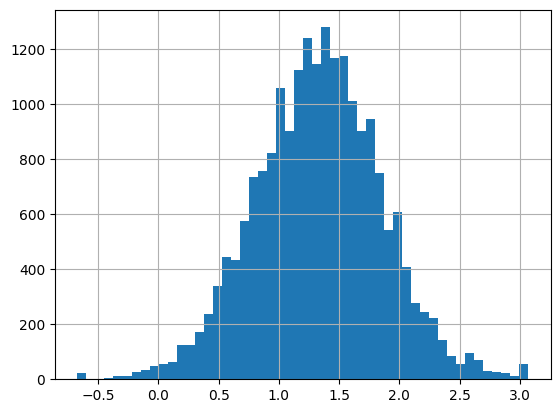

In [283]:
# Importamos funcionalidad de la librería
from scipy.stats import boxcox
# Aplicamos transformación
x_transformed, lambda_boxcox = boxcox(X['MedInc'])
# Vemos cuánto varía el coeficiente de Fisher-Pearson
print(f"Valor del coeficiente de Fisher-Pearson sobre la distribución transformada: {skew(x_transformed)}")
# Dibujamos el resultado
pd.Series(x_transformed).hist(bins=50)

Para finalizar la sección, resaltar que es importante guardar el valor de `lambda_boxcox` para poder revertir las operaciones de esta transformación.

### Estudio de variables discretas

Debido a que la correspondencia entre los valores de este tipo de variables y su correspondencia numérica puede ser realizada de múltiples formas, el análisis de las mismas no suele ser tan inmediato como el aso de las continuas. Naturalmente, cuando la variable es discreta pero ya es numérica (como la edad), no precisa del empleo de estas técnicas, pues como veremos posteriormente se corresponde al caso de binarización.

Nos pondremos por tanto en la situación en la que dispongamos de una variable discreta en forma de `string`, el que requiere mayor atención.

#### *One-hot encoding*

Es el tipo de codificado más elemental, y consiste en descomponer en tantas columnas como valores posibles tome esa variable menos uno la información binarizada. Veámoslo sobre el ejemplo del banco de datos de UCI:

In [284]:
# # # Construimos el objeto pd.DataFrame

df = pd.DataFrame(data=data, columns=col_names)

df.head()




,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [285]:
# Tomamos la columna correspondiente al nombre de los países
# y vemos qué valores distintos toma
print(f"En el dataset hay {df['name'].nunique()} países distintos.")

En el dataset hay 194 países distintos.


In [286]:
# Importamos la funcionalidad concreta de sklearn
from sklearn.preprocessing import OneHotEncoder
# Transformamos esta columna. Usamos el método `to_array()`
# porque originalmente el encoder devuelve una matriz
# sparse (dispersa), cuya explicación se sale del contenido
# del curso.
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['name']]).toarray()
# print(encoded_data)
column_names = encoder.get_feature_names_out()
# print(column_names)
# Unimos la información
onehot_name_df = pd.DataFrame(data=encoded_data, columns=column_names)
# Mostramos por pantalla
onehot_name_df

,name_Afghanistan,name_Albania,name_Algeria,name_American-Samoa,name_Andorra,name_Angola,name_Anguilla,name_Antigua-Barbuda,name_Argentina,name_Argentine,...,name_Uruguay,name_Vanuatu,name_Vatican-City,name_Venezuela,name_Vietnam,name_Western-Samoa,name_Yugoslavia,name_Zaire,name_Zambia,name_Zimbabwe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Como vemos, esta estrategia es útil para distinguir todos los casos posibles por columnas, pero en casos como este en los que hay muchos valores posibles, este codificado no es útil y necesitamos otras estrategias como las siguientes.

#### Label encoding

Es el método más utilizado cuando no existe una periodicidad en la información, como el caso de los nombres de los países *(¿o quizás si existe una cierta periodicidad? Piensa en cómo podrías usar la latitud y longitud de cada país)*. En él, simplemente se asignan sucesivos números naturales a cada elemento:

In [287]:
# Importamos la funcionalidad concreta de sklearn
from sklearn.preprocessing import LabelEncoder
# Transformamos esta columna
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df[['name']])
# Unimos la información
onehot_name_df = pd.DataFrame(data=encoded_data, columns=['name'])
# Mostramos por pantalla
onehot_name_df.head()

c:\Users\israe\OneDrive\Escritorio\Data Analist\Modulo0\BootCamp\venv_analytics\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,name
0,0
1,1
2,2
3,3
4,4


In [288]:
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


Una forma más elegante, rápida y efectiva de hacer este tipo de codificado, y sin recurrir a librerías externas, es creando nosotros un propio diccionario de mapeo entre categorías y números naturales como sigue:

In [289]:
# Creamos el diccionario de mapeo
label2idx = {k:v for k,v in zip(df['name'].unique(), range(df['name'].nunique()))}
# print(label2idx)
# Mapeamos el diccionario a la columna en cuestión
df['name'] = df['name'].map(label2idx)
# Mostramos resultados
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,0,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,1,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,2,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,3,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,4,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### Datos faltantes

Todo lo visto anteriormente es válido cuando la información de la que disponemos es completa. Sin embargo, en la mayoría de escenarios nos encontraremos con información faltante, escenario que hay que saber manejar con cuidado.

Comencemos por obtener del repositorio UCI un conjunto de datos con información faltante, como hemos visto anteriormente, con la salvedad de que ahora los nombres de las columnas pueden contener guiones, de ahí que el término regex de términos alfabéticos `[a-zA-Z]` haya sido actualizado para contener dichos símbolos como `[a-zA-Z-]`, así como contemplando los dobles puntos finales como `:{1}`:

In [290]:
# Volvemos atrás un directorio
if not os.getcwd().split('\\')[-1]=='07-PREPROCESAMIENTO': os.chdir('..')
# Ahora localizamos la nueva ruta
if not os.path.isdir('imports_dataset/'): os.mkdir('imports_dataset/')
os.chdir('imports_dataset/')
# Descargamos el fichero que contiene los datos a nuestro directorio activo
response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')
with open("imports-85.data", "wb") as f:
    f.write(response.content)
# Descargamos la metadata asociada al conjunto de datos
response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names')
with open("imports-85.names", "wb") as f:
    f.write(response.content)


In [291]:
# Leemos datos
with open('imports-85.data','r') as f:
    data = f.read().splitlines() # Dividimos el texto por saltos de línea
    data = [elem.split(',') for elem in data] # Dividimos cada línea por las comas y removemos líneas vacías
# Leemos metadata
with open('imports-85.names','r') as f:
    metadata = f.read().splitlines()
    


In [292]:
# Regex
regex_fn = lambda text: re.findall('^\s+\d+[.]\s{1}[a-zA-Z-]+:{1}', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z-]+', text)
metadata_list = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if regex_fn(elem)]
# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)

In [293]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.00,106,4800,26,27,22470


Si probamos directamente a analizar cuántos datos faltan en nuestro *dataset*, nos adremos cuenta de algo sorprendente:

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          205 non-null    object
 1   normalized-losses  205 non-null    object
 2   make               205 non-null    object
 3   fuel-type          205 non-null    object
 4   aspiration         205 non-null    object
 5   num-of-doors       205 non-null    object
 6   body-style         205 non-null    object
 7   drive-wheels       205 non-null    object
 8   engine-location    205 non-null    object
 9   wheel-base         205 non-null    object
 10  length             205 non-null    object
 11  width              205 non-null    object
 12  height             205 non-null    object
 13  curb-weight        205 non-null    object
 14  engine-type        205 non-null    object
 15  num-of-cylinders   205 non-null    object
 16  engine-size        205 non-null    object
 1

*¿Pero no decíamos que faltaban datos?* Echemos un vistazo al *dataset*:

In [295]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


El problema está en que, en este conjunto de datos concreto, la información nula no viene como un elemento nulo de `numpy` o `pandas`, si no que viene en forma de interrogación. Por ello, primero tendremos que reemplazar dicho símbolo por un valor nulo, y luego buscarlos: 

In [296]:
# Reemplazamos '?' por nulo
df = df.replace('?',np.NaN)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          205 non-null    object
 1   normalized-losses  164 non-null    object
 2   make               205 non-null    object
 3   fuel-type          205 non-null    object
 4   aspiration         205 non-null    object
 5   num-of-doors       203 non-null    object
 6   body-style         205 non-null    object
 7   drive-wheels       205 non-null    object
 8   engine-location    205 non-null    object
 9   wheel-base         205 non-null    object
 10  length             205 non-null    object
 11  width              205 non-null    object
 12  height             205 non-null    object
 13  curb-weight        205 non-null    object
 14  engine-type        205 non-null    object
 15  num-of-cylinders   205 non-null    object
 16  engine-size        205 non-null    object
 1

In [298]:
# Vemos qué columnas tienen datos faltantes
missing_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
missing_cols

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

In [299]:
# Filtramos las filas donde hay algún dato nulo, y las columnas donde están
df.loc[df.isnull().sum(axis=1)>0, missing_cols]

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
0,NaN,two,3.47,2.68,111,5000,13495
1,NaN,two,3.47,2.68,111,5000,16500
2,NaN,two,2.68,3.47,154,5000,16500
5,NaN,two,3.19,3.40,110,5500,15250
7,NaN,four,3.19,3.40,110,5500,18920
9,NaN,two,3.13,3.40,160,5500,NaN
14,NaN,four,3.31,3.19,121,4250,24565
15,NaN,four,3.62,3.39,182,5400,30760
16,NaN,two,3.62,3.39,182,5400,41315
17,NaN,four,3.62,3.39,182,5400,36880


Ahora sí que podemos estudiar los datos faltantes. Un detalle que hemos dejado pasar por alto hasta este momento es que todas las columnas han sido interpretadas como `object`, aunque muchas de ellas no lo son. Vamos a convertir a numérico aquellas que lo permitan ahora que hemos corregido esa anomalía de las interrogaciones:

In [300]:
# Iteramos sobre las columnas del dataset
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
# Comprobamos que se han convertido con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Como podemos ver, existen tanto variables continuas como discretas. El procedimiento habitual suele ser el siguiente:

* Encontrar dentro del conjunto de datos una serie de variables que permitan estratificar la muestra con cierta lógica. En este caso, como se trata de un conjunto de datos de coches y sus especificaciones, partiremos de la (no necesariamente buena) hipótesis que vehículos que sean del mismo `engine-size`, `body-style` y `fuel-system` tengan características similares. Nótese qeu las variables que hemos elegico no tienen valores nulos.
* Si alguna de las variables anteriormente elegidas es continua, como es el caso de `horsepower`, se discretiza en *cajas* de igual tamaño para identificar vehículos de cilindrada parecida. Esto lo haremos creando una nueva columna en los datos (que luego eliminaremos) mediante:

  ```python
  # Tomamos el mínimo y máximo de los datos
  min_col, max_col = df['engine-size'].min(), df['engine-size'].max()
  # Decidimos en cuántas cajas vamos a estratificar los datos
  num_boxes = 8
  # Creamos los valores que segmentarán las cajas
  bins = np.linspace(min_col, max_col, num_boxes+1)
  # Creamos la columna discretizada
  df['engine-size-disc'] = np.digitize(df['engine-size'], bins)
  ```

* Agrupamos los datos por dichas variables y reemplazamos los nulos por la media (para variables continuas) o la moda (para variables discretas). Para ello, nos ayudaremos de este método auxiliar *casero*:

```python
def replace_missing_data(df):
    # Vemos qué columnas tienen valores nulos
    mis_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
    # Iteramos sobre ellas
    for col in mis_cols:
        # Si la variable es discreta,...
        if df[col].dtype in ['object']:
            mode_col = df[col].mode().values[0]
            df[col] = df[col].fillna(mode_col)
        # Si son números enteros
        elif df[col].dtype in ['int']:
            df[col] = df[col].fillna(df['col'].median())
        # Si son números reales
        elif df[col].dtype in ['float']:
            df[col] = df[col].fillna(df['col'].mean())
    # Devolvemos el DataFrame
    return df
```

Uniendo todo, nos queda:

In [301]:
# Tomamos el mínimo y máximo de los datos
min_col, max_col = df['engine-size'].min(), df['engine-size'].max()
# Decidimos en cuántas cajas vamos a estratificar los datos
num_boxes = 5
# Creamos los valores que segmentarán las cajas
bins = np.linspace(min_col, max_col, num_boxes+1)
# Creamos la columna discretizada
df['engine-size-disc'] = np.digitize(df['engine-size'], bins)

# Método auxiliar
def replace_missing_data(g):
    # Vemos qué columnas tienen valores nulos
    mis_cols = list(g.isnull().sum(axis=0)[g.isnull().sum(axis=0)>0].index)
    # Iteramos sobre ellas
    for col in mis_cols:
        # Si la variable es discreta,...
        if g[col].dtype in ['object']:
            mode_col = g[col].mode().values[0]
            g[col] = g[col].fillna(mode_col)
        # Si son números enteros
        elif g[col].dtype in ['int']:
            g[col] = g[col].fillna(g[col].median())
        # Si son números reales
        elif df[col].dtype in ['float']:
            g[col] = g[col].fillna(g[col].mean())
    # Devolvemos el DataFrame
    return g

# Rellenamos valores por grupos
df = df.groupby(['engine-size-disc', 'body-style', 'fuel-system'],group_keys=False).apply(lambda g: replace_missing_data(g))
# Eliminamos columna añadida
df.drop('engine-size-disc', axis=1, inplace=True)

Ya tenemos nuestros datos sin valores nulos y listos para ser procesados:

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  191 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [303]:
print(list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index))

['normalized-losses', 'bore', 'stroke']


In [304]:
print(df['normalized-losses'])

0      134.00
1      134.00
2      129.25
3      164.00
4      164.00
        ...  
200     95.00
201     95.00
202     95.00
203     95.00
204     95.00
Name: normalized-losses, Length: 205, dtype: float64
